In [ ]:
from pathlib import Path
from zipfile import ZipFile
import requests

URL="https://www.kaggle.com/api/v1/datasets/download/yasserh/titanic-dataset"
TITANIC_ZIP = "titanic.zip"
titanic_path = Path(TITANIC_ZIP)
if not titanic_path.exists():
    data = requests.get(URL)
    with open(TITANIC_ZIP,"wb") as f:
        f.write(data.content)
    with open(TITANIC_ZIP, 'rb') as f:
        ZipFile(f).extractall()
    print('Bestand is gedownload en uitgepakt')
else:
    print('Bestand bestaat al')




## Lees de data

In [1]:
import pandas as pd
TITANIC_CSV = "Titanic-Dataset.csv"
df = pd.read_csv(TITANIC_CSV)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Filter de kolommen
We zijn alleen geïnteresseerd in Survived, Sex, Pclass en Age

In [2]:
df = df[['Survived', 'Sex', 'Pclass', 'Age']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Pclass    891 non-null    int64  
 3   Age       714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


## Sex is een category

In [3]:
df['Sex'] = df.Sex.astype('category')
df.info()
df['Sex']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Sex       891 non-null    category
 2   Pclass    891 non-null    int64   
 3   Age       714 non-null    float64 
dtypes: category(1), float64(1), int64(2)
memory usage: 22.0 KB


0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: category
Categories (2, object): ['female', 'male']

## Survived is een boolean

In [4]:
df['Survived'] = df.Survived.astype(pd.BooleanDtype())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    boolean 
 1   Sex       891 non-null    category
 2   Pclass    891 non-null    int64   
 3   Age       714 non-null    float64 
dtypes: boolean(1), category(1), float64(1), int64(1)
memory usage: 16.8 KB


## Alleen bekende leeftijden overhouden


In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  714 non-null    boolean 
 1   Sex       714 non-null    category
 2   Pclass    714 non-null    int64   
 3   Age       714 non-null    float64 
dtypes: boolean(1), category(1), float64(1), int64(1)
memory usage: 18.9 KB


## Bereken de aantallen overlevenden/niet-overlevenden per klasse

In [6]:
per_Pclass = df.groupby(['Pclass', 'Survived']).size().unstack() #zet Pclass als index
per_Pclass

Survived,False,True
Pclass,,
1,64,122
2,90,83
3,270,85


## Bereken de percentages

In [7]:
percentages = per_Pclass.div(per_Pclass.sum(axis=1), axis=0) * 100
percentages

Survived,False,True
Pclass,,
1,34.408602,65.591398
2,52.023121,47.976879
3,76.056338,23.943662


## Plot de overlevingskans per klasse

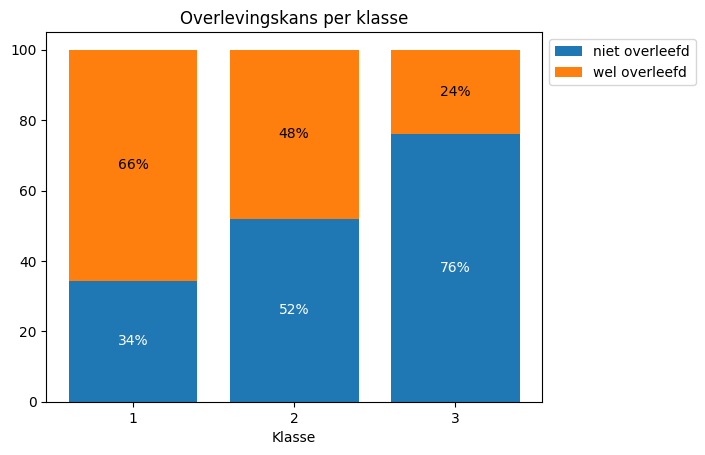

In [8]:
import matplotlib.pyplot as plt

bar = plt.bar(percentages.index, percentages.iloc[:, 0], label='niet overleefd')
plt.gca().bar_label(bar, fmt='{:,.0f}%', label_type='center', color='white')
bar = plt.bar(percentages.index, percentages.iloc[:, 1], bottom=percentages.iloc[:, 0], label='wel overleefd')
plt.gca().bar_label(bar, fmt='{:,.0f}%', label_type='center')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Klasse')
plt.title('Overlevingskans per klasse')
plt.xticks(per_Pclass.index)
plt.show()

In [15]:
male, female

(Survived      False      True 
 Pclass                        
 1          60.39604   39.60396
 2         84.848485  15.151515
 3         84.980237  15.019763,
 Survived      False      True 
 Pclass                        
 1          3.529412  96.470588
 2          8.108108  91.891892
 3         53.921569  46.078431)

# Verdeling leeftijd-overleefd per klasse en per geslacht
Maak de onderstaande grafiek. Je mag de hulp inroepen van ChatGPT. Maar beschrijf zelf in markdown cellen wat elke stap doet (vraag geen bijkomende uitleg aan ChatGPT). Dat wil zeggen dat je de documentatie zult moeten opzoeken voor elke functie die ChatGPT gebruikt en die je niet kent.

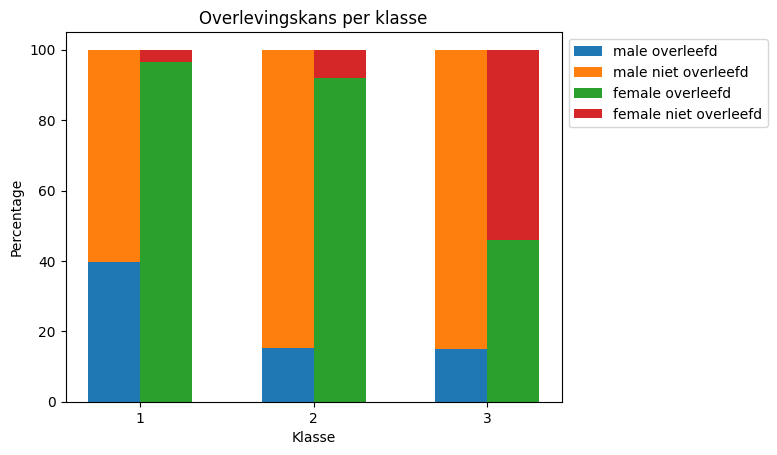

In [16]:
import numpy as np
# groeperen op Pclass en Sex, kijkend naar de kolom 'Survived'
# value_counts(normalize=True) berekent de verhouding tussen overlevers (1) en niet-overlevers (0)
# unstack() kantelt de tabel
percentages = df.groupby(['Pclass', 'Sex'], observed=True)['Survived'].value_counts(normalize=True).unstack() * 100

# maken van een cross-section om de data te splitsen op basis van 'Sex'
male = percentages.xs('male', level='Sex')
female = percentages.xs('female', level='Sex')

bar_width = 0.3 # variable voor balkbreedte
x = np.array([0, 1, 2]) # array voor x punten te definiëren

# barplot voor mannen die het wel overleefd hebben
# x - bar_width/2 zorgt er voor dat de balk mooi in het midden van de xtick staat
# male[1] toont de balk voor de mannen die het overleeft hebben
plt.bar(x - bar_width/2, male[True], bar_width, label='male overleefd')

# barplot voor mannen die het niet overleefd hebben
# bottom=male[1] zorgt ervoor dat deze balk bovenop de vorige balk geplaatst wordt
plt.bar(x - bar_width/2, male[False], bar_width, bottom= male[True], label='male niet overleefd')

# barplot voor vrouwen die het wel overleefd hebben
plt.bar(x + bar_width/2, female[True], bar_width, label='female overleefd')

# barplot voor vrouwen die het niet overleefd hebben
plt.bar(x + bar_width/2, female[False], bar_width, female[True], label='female niet overleefd')

plt.xlabel('Klasse') # label voor de x-as
plt.ylabel('Percentage') # label voor de y-as
plt.title('Overlevingskans per klasse') # title voor de barplot
plt.xticks(x, per_Pclass.index) # vervangt de standaard x-labels (0, 1, 2) op de x-as door de per_Pclass labels (1, 2, 3)

# toont legende waarbij de locatie van het linkerbovenpunt ('upper left') van de legende wordt vastgezet op de rechterbovenpunt van de grafiek (assen gaan van 0 tot 1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show() # toont grafiek

